In [3]:
import pandas as pd

df = pd.read_csv('../data/sales_data.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.dropna(inplace=True)

In [23]:
# INDIAN DATE FORMAT FIX (15/04/2018 → datetime)
print("🔍 Fixing Indian date format...")

# Indian format specify karo (DD/MM/YYYY)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# New columns banao
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print("✅ Dates fixed successfully!")
print("Date range:", df['Order Date'].min(), "to", df['Order Date'].max())
print("New columns added:")
print(df[['Order Date', 'Year', 'Month', 'Ship_Days']].head(3))
print("Dataset ready for analysis! Shape:", df.shape)

🔍 Fixing Indian date format...
✅ Dates fixed successfully!
Date range: 2015-01-03 00:00:00 to 2018-12-30 00:00:00
New columns added:
  Order Date  Year     Month  Ship_Days
0 2017-11-08  2017  November          3
1 2017-11-08  2017  November          3
2 2017-06-12  2017      June          4
Dataset ready for analysis! Shape: (9789, 21)


In [24]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Year                      int32
Month                    object
Ship_Days                 int64
dtype: object

In [27]:
# TEMPORARY SAVE (Same notebook folder mein)
df.to_csv('cleaned_sales_data.csv', index=False)  
print("✅ SAVED in notebooks folder!")
print("📁 File: notebooks/cleaned_sales_data.csv")

✅ SAVED in notebooks folder!
📁 File: notebooks/cleaned_sales_data.csv


In [28]:
# TOP CATEGORIES + REGIONS
print("🥇 TOP 5 CATEGORIES BY SALES:")
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(top_categories.head())

print("🌍 TOP REGIONS BY SALES:")
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(top_regions)

print("📅 BEST MONTHS:")
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales.sort_values(ascending=False).head())

🥇 TOP 5 CATEGORIES BY SALES:
Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64
🌍 TOP REGIONS BY SALES:
Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64
📅 BEST MONTHS:
Month
November     345041.6110
December     321275.1395
September    300103.4117
October      199496.2947
March        197573.5872
Name: Sales, dtype: float64


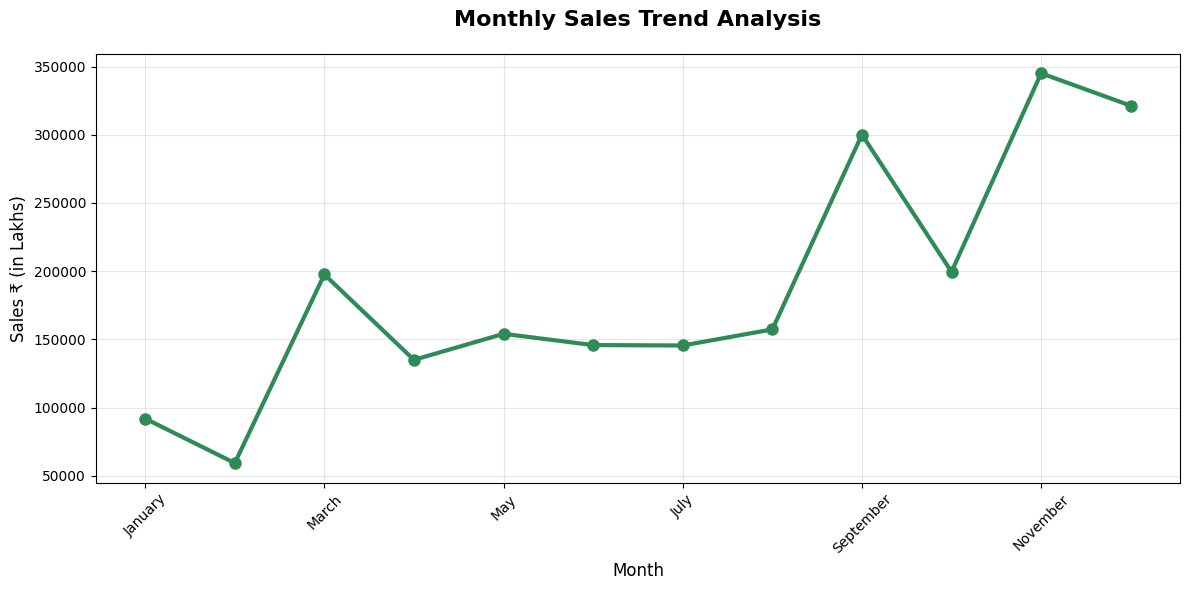

✅ Chart SAVED in output/monthly_sales.png


In [29]:
# MONTHLY SALES CHART (Professional)
import matplotlib.pyplot as plt

# Monthly sales data
monthly_sales = df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Chart banao
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=3, markersize=8, color='#2E8B57')
plt.title('Monthly Sales Trend Analysis', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Sales ₹ (in Lakhs)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# SAVE karo portfolio ke liye
plt.savefig('../output/monthly_sales.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart SAVED in output/monthly_sales.png")

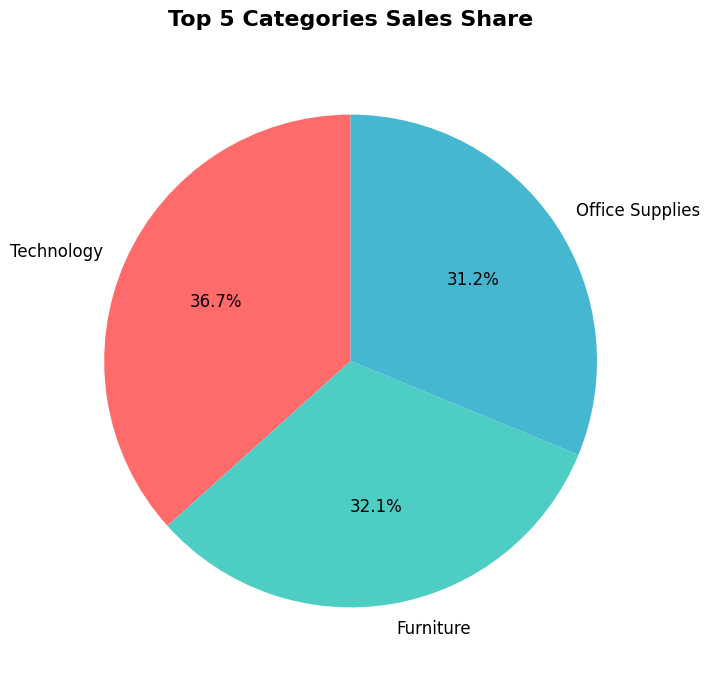

🥧 Top Categories:
Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64
✅ Pie chart SAVED!


In [30]:
# CATEGORY PIE CHART (Interview Favorite!)
plt.figure(figsize=(10, 8))

# Top 5 categories only (clean chart)
top_5_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

plt.pie(top_5_cat.values, labels=top_5_cat.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Top 5 Categories Sales Share', fontsize=16, fontweight='bold', pad=20)

# SAVE professional quality
plt.savefig('../output/category_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("🥧 Top Categories:")
print(top_5_cat)
print("✅ Pie chart SAVED!")

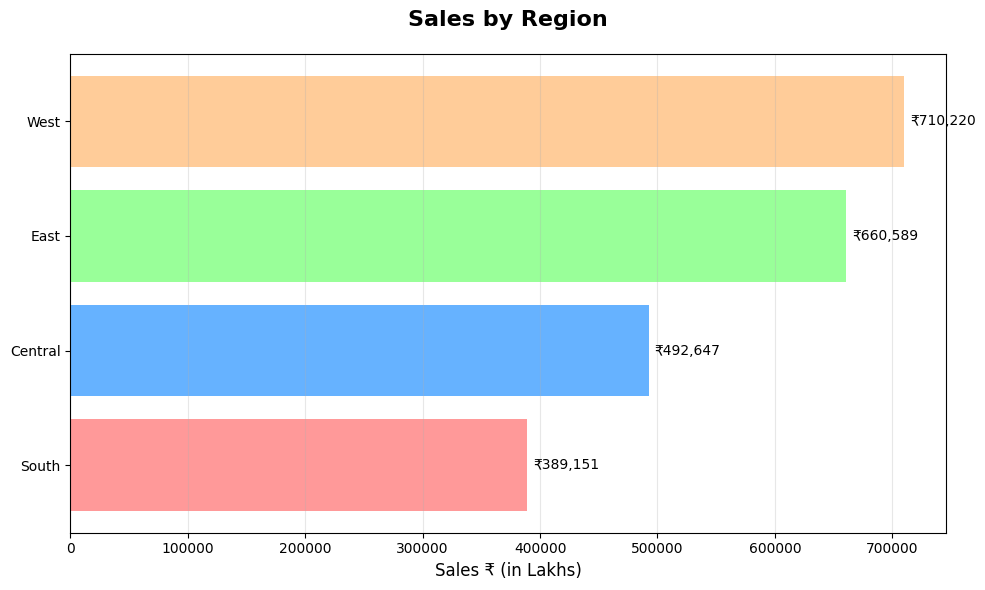

🌍 Region Performance:
Region
South      389151.4590
Central    492646.9132
East       660589.3560
West       710219.6845
Name: Sales, dtype: float64
✅ Bar chart SAVED!


In [31]:
# REGION BAR CHART
plt.figure(figsize=(10, 6))

# Region wise sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)

bars = plt.barh(region_sales.index, region_sales.values, 
                color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Sales by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sales ₹ (in Lakhs)', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Value labels on bars
for i, v in enumerate(region_sales.values):
    plt.text(v + 5000, i, f'₹{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../output/region_sales.png', dpi=300, bbox_inches='tight')
plt.show()

print("🌍 Region Performance:")
print(region_sales)
print("✅ Bar chart SAVED!")

In [35]:
# FIXED INSIGHTS (Simple Version)
print("="*50)
print("📊 KEY BUSINESS INSIGHTS")
print("="*50)

# Total metrics
print(f"💰 Total Sales: ₹{df['Sales'].sum():,.0f}")
print(f"📦 Total Orders: {len(df)}")

# Top category manually
categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(f"🥇 Top Category: {categories.index[0]} (₹{categories.iloc[0]:,.0f})")

# Top region
regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(f"🌍 Top Region: {regions.index[0]} (₹{regions.iloc[0]:,.0f})")

# Best month
months = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print(f"📅 Best Month: {months.index[0]} (₹{months.iloc[0]:,.0f})")

print("🎯 RECOMMENDATIONS:")
print("1. Focus on TOP CATEGORY")
print("2. Expand in TOP REGION") 
print("3. Plan promotions in BEST MONTH")
print("✅ Ready for Dashboard!")
print("="*50)

📊 KEY BUSINESS INSIGHTS
💰 Total Sales: ₹2,252,607
📦 Total Orders: 9789
🥇 Top Category: Technology (₹825,856)
🌍 Top Region: West (₹710,220)
📅 Best Month: November (₹345,042)
🎯 RECOMMENDATIONS:
1. Focus on TOP CATEGORY
2. Expand in TOP REGION
3. Plan promotions in BEST MONTH
✅ Ready for Dashboard!
